In [3]:
import shap


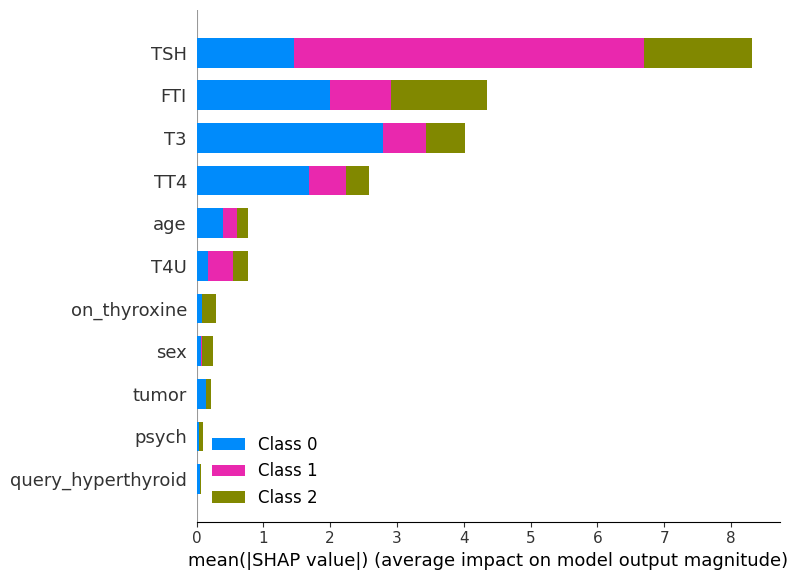

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.

In [4]:
# Initialize SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, x_test)

# SHAP Dependence Plot for a specific feature, e.g., 'age'
shap.dependence_plot('age', shap_values, x_test)

# SHAP Force Plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:])

# Save SHAP plots
plt.savefig('summary_plot.png')
plt.clf()
shap.save_html('force_plot.html', shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:]))

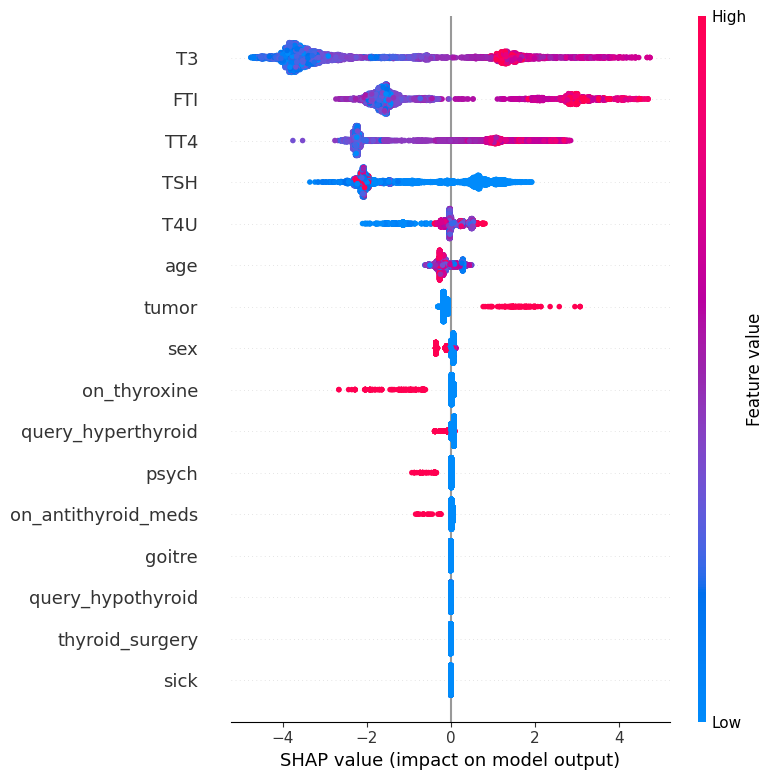

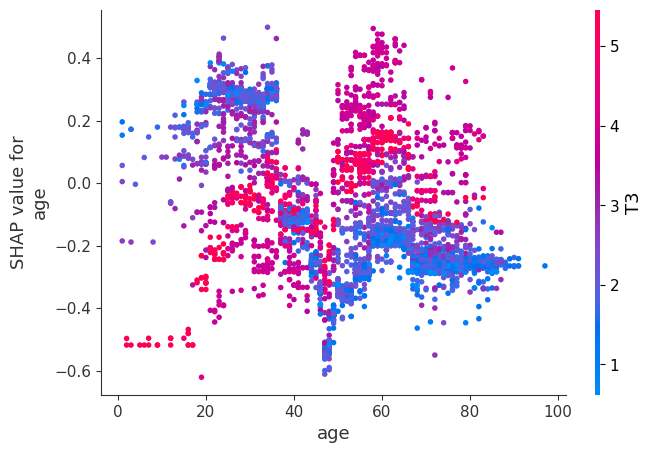

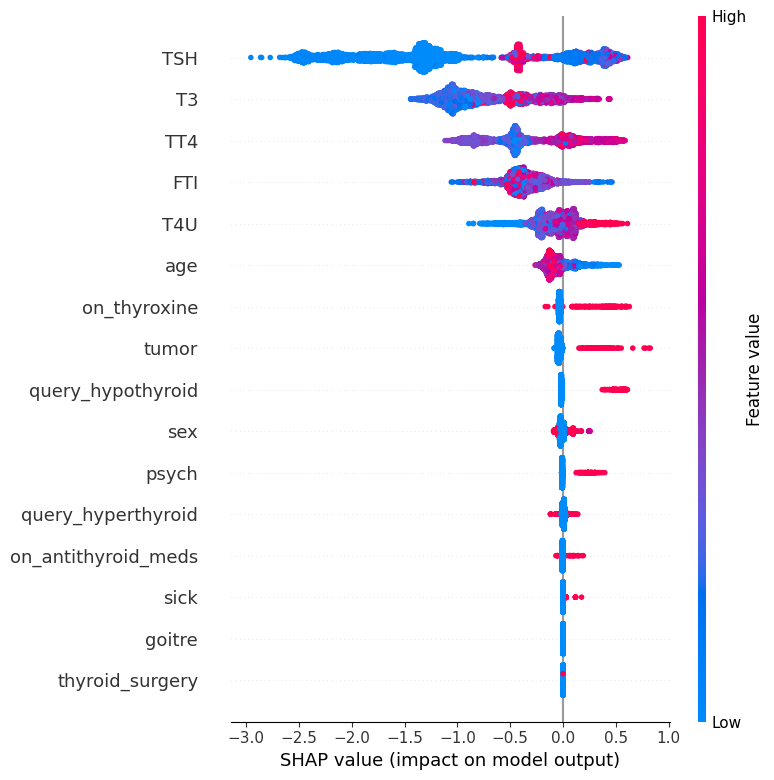

In [11]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)

# Choose the SHAP values for the first class as an example
# You can modify this index to select a different class
shap_values_for_class = shap_values[0]

# SHAP Summary Plot for the first class
shap.summary_plot(shap_values_for_class, x_test)

# SHAP Dependence Plot for a specific feature, e.g., 'age', for the first class
shap.dependence_plot('age', shap_values_for_class, x_test)

# SHAP Force Plot for a single prediction for the first class
shap.force_plot(explainer.expected_value[0], shap_values_for_class[0,:], x_test.iloc[0,:])

# Optionally, if you want to see the average effect across all classes:
average_shap_values = np.mean(shap_values, axis=0)
shap.summary_plot(average_shap_values, x_test)

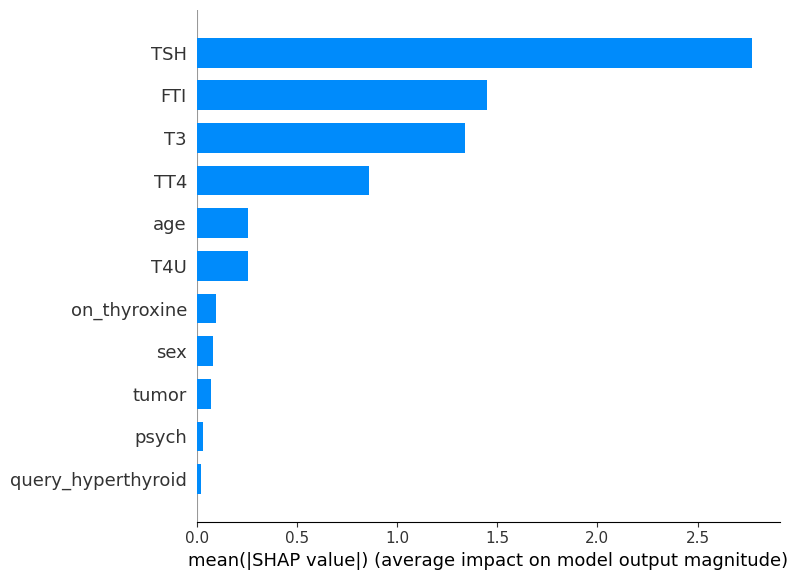

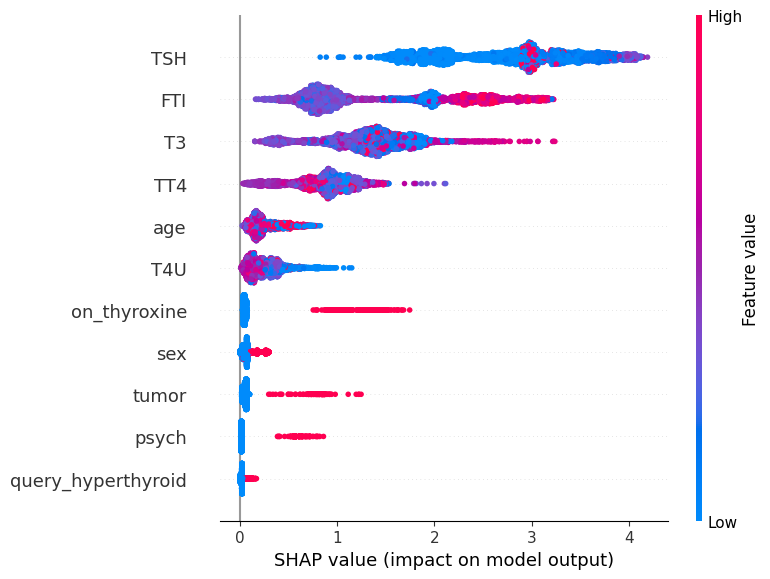

In [5]:
# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)

# Calculate average SHAP values across all output classes
average_shap_values = np.mean(np.abs(shap_values), axis=0)

# SHAP Summary Plot showing the average impact of each feature
shap.summary_plot(average_shap_values, x_test, plot_type="bar")

# Optional: Detailed SHAP Summary Plot (not bar) for deeper insights
shap.summary_plot(average_shap_values, x_test)

Class 0 SHAP Values:


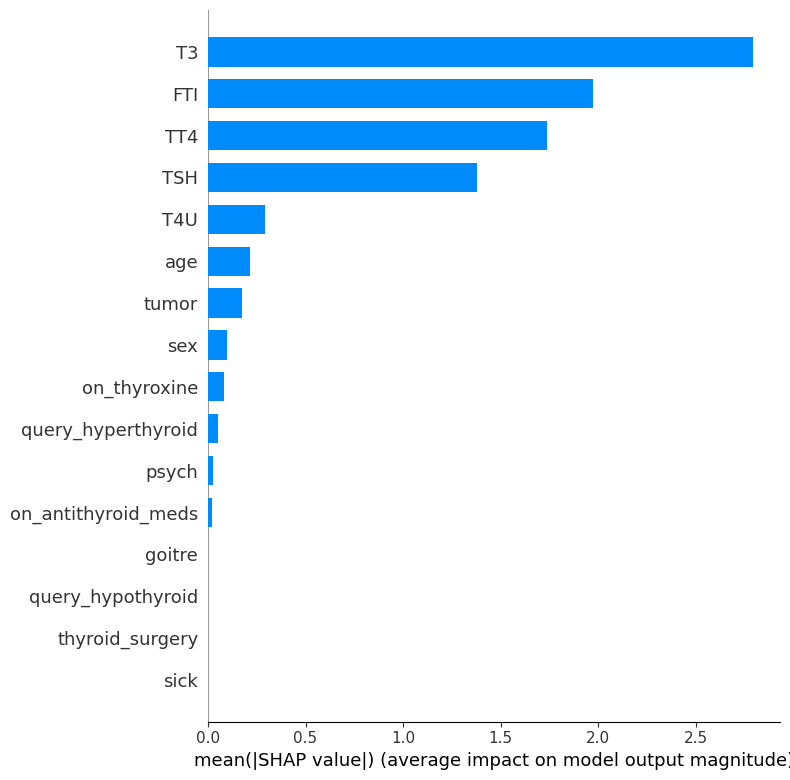

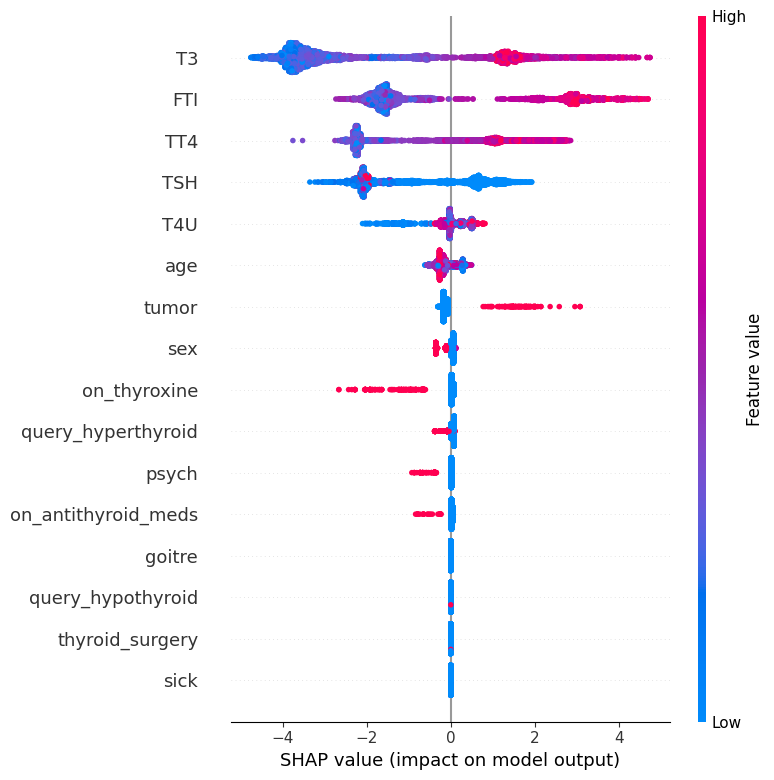

Class 1 SHAP Values:


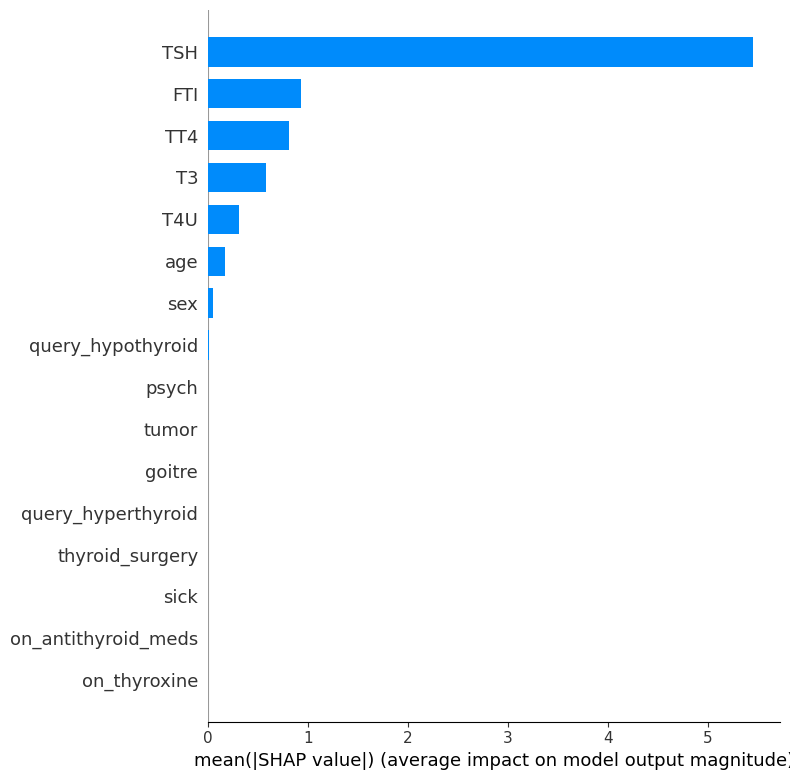

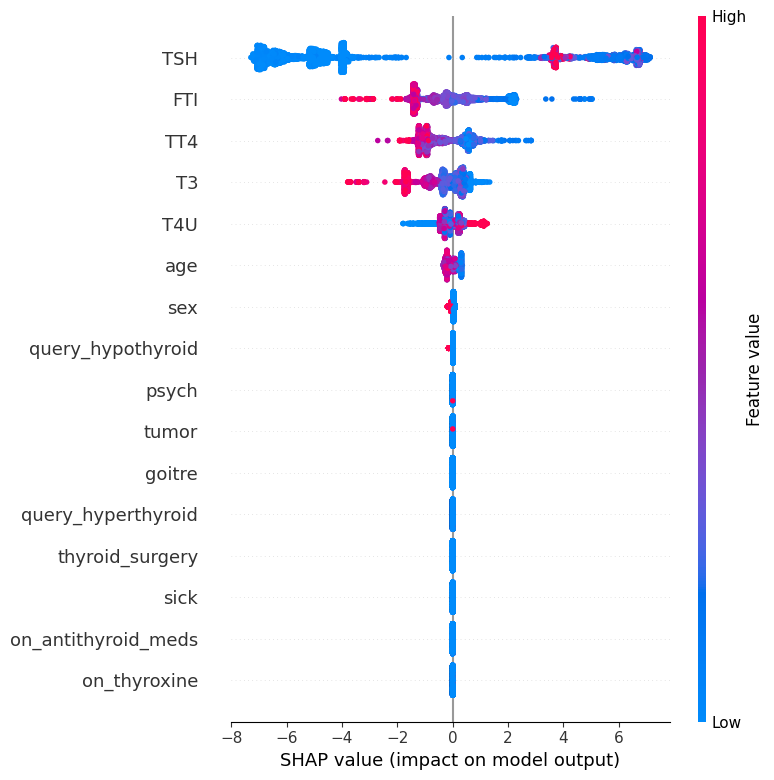

Class 2 SHAP Values:


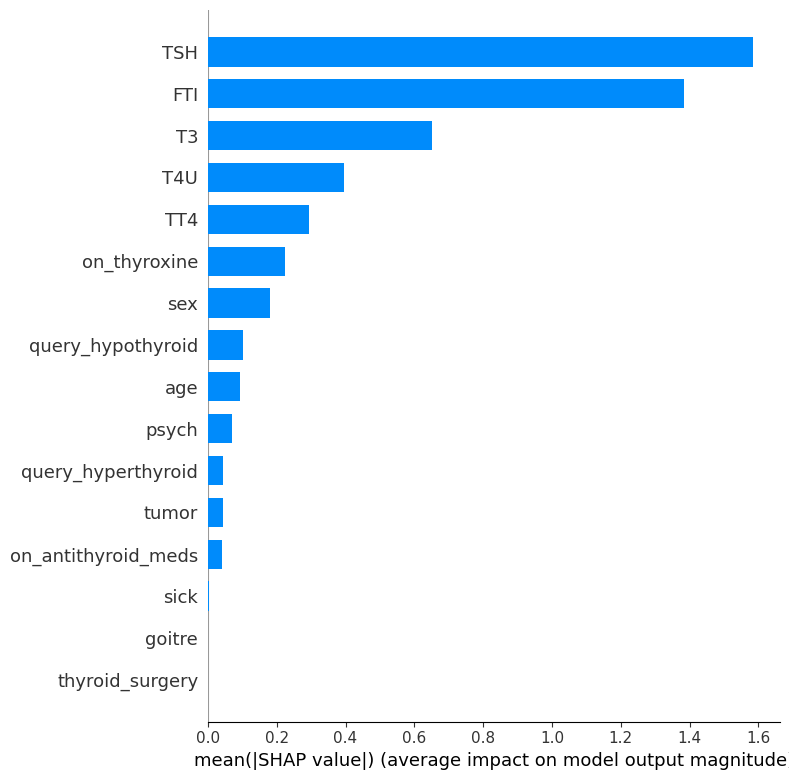

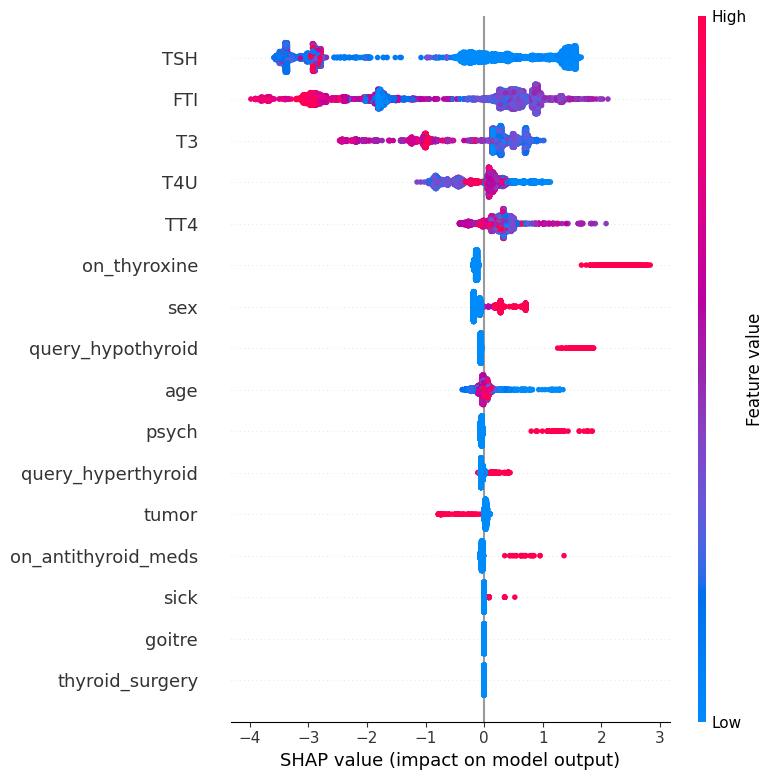

<Figure size 2000x300 with 0 Axes>

In [13]:
# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)

# Iterate over each class and visualize SHAP values
num_classes = len(np.unique(y))
for i in range(num_classes):
    print(f"Class {i} SHAP Values:")
    
    # Summary plot for the current class
    shap.summary_plot(shap_values[i], x_test, plot_type="bar")
    
    # Optional: Detailed SHAP summary plot for current class
    shap.summary_plot(shap_values[i], x_test)

    # Force plot for a single prediction for the current class
    shap.force_plot(explainer.expected_value[i], shap_values[i][0,:], x_test.iloc[0,:], show=False, matplotlib=True).savefig(f'force_plot_class_{i}.png')
    plt.clf()  # Clear the plot to prepare for the next one

In [ ]:
import shap
from sklearn.preprocessing import StandardScaler

# Assuming 'x_train' and 'x_test' are already defined and preprocessed
# Ensure data is scaled as neural networks are sensitive to unscaled data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize SHAP DeepExplainer
explainer = shap.DeepExplainer(mlp_model, x_train_scaled[np.random.choice(x_train_scaled.shape[0], 100, replace=False)])

# Compute SHAP values
shap_values = explainer.shap_values(x_test_scaled)

# Summarize the SHAP values in a plot
shap.summary_plot(shap_values[0], x_test_scaled, feature_names=x_train.columns)

# Additionally, visualize the SHAP values for the first prediction
shap.force_plot(explainer.expected_value[0], shap_values[0][0], x_test_scaled[0], feature_names=x_train.columns)

  0%|          | 0/100 [00:00<?, ?it/s]

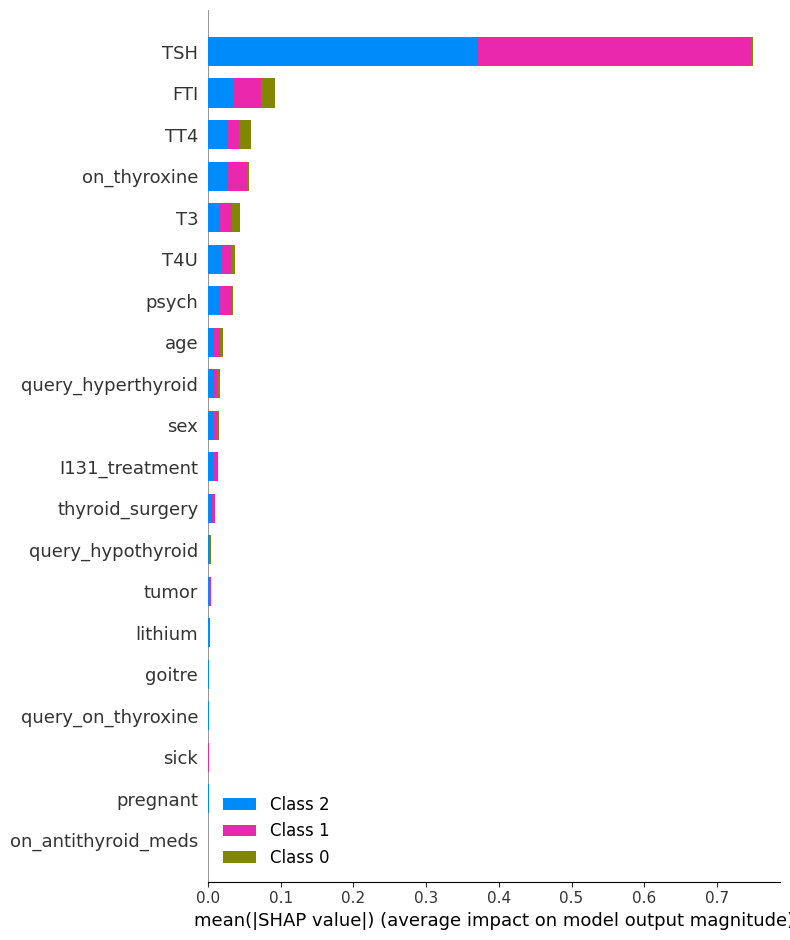

In [16]:
import shap
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and target arrays respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardize the data as neural networks require feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500, alpha=0.0001, solver='adam', random_state=42)
mlp.fit(x_train_scaled, y_train)

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(mlp.predict_proba, shap.kmeans(x_train_scaled, 10))  # shap.kmeans is used to summarize the background distribution

# Compute SHAP values for a subset of the test set for efficiency
shap_values = explainer.shap_values(x_test_scaled[:100])  # Adjust the subset size as needed

# Summarize the SHAP values in a plot
shap.summary_plot(shap_values, x_test_scaled[:100], feature_names=x_train.columns)

# Additionally, visualize the SHAP values for the first prediction
shap.force_plot(explainer.expected_value[1], shap_values[1][0], x_test_scaled[0], feature_names=x_train.columns)
